In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import scipy.stats as st
import numpy as np
import itertools
import random
import matplotlib.cm as cm

In [2]:
file='cvs_output.csv'

file_one = pd.read_csv(file)
file_one

,Unnamed: 0,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
0,0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Symptoms of Anxiety Disorder,By State,Kansas,Kansas,10,July 2 - July 7,32.3,28.2,36.6,28.2 - 36.6,31.4-32.9
1996,1996,Symptoms of Anxiety Disorder,By State,Kentucky,Kentucky,10,July 2 - July 7,36.3,31.2,41.6,31.2 - 41.6,35.4-40.6
1997,1997,Symptoms of Anxiety Disorder,By State,Louisiana,Louisiana,10,July 2 - July 7,38.6,34.2,43.1,34.2 - 43.1,35.4-40.6
1998,1998,Symptoms of Anxiety Disorder,By State,Maine,Maine,10,July 2 - July 7,32.8,29.0,36.7,29.0 - 36.7,31.4-32.9


In [3]:
kansas_df = file_one.loc[file_one["state"] == "Kansas", :]
kansas_df['indicator'].value_counts()
kansas_df

missouri_df=file_one.loc[file_one['state']=='Missouri']
missouri_df

ks_mo=pd.merge(kansas_df,missouri_df, how='outer')
ks_mo

cleaned_KsMo=ks_mo[['indicator','state','week','value']]
cleaned_KsMo

cleaned=cleaned_KsMo.groupby(['week','indicator'])
cleaned.count().head(10)

state_mean=cleaned['value'].mean()
final=pd.DataFrame({'KS & MO Average(%)':state_mean})
final.head()


KS & MO Average(%)
week indicator                                                             
1    Symptoms of Anxiety Disorder                                     28.40
     Symptoms of Anxiety Disorder or Depressive Diso...               33.85
     Symptoms of Depressive Disorder                                  21.55
2    Symptoms of Anxiety Disorder                                     31.45
     Symptoms of Anxiety Disorder or Depressive Diso...               34.65

In [4]:
new_name_df= file_one[["indicator", "week","state", "value"]].copy()
new_name_df[:3] 

,indicator,week,state,value
0,Symptoms of Depressive Disorder,1,United States,23.5
1,Symptoms of Depressive Disorder,1,United States,32.7
2,Symptoms of Depressive Disorder,1,United States,25.7


In [5]:
#chart for kansas 
kansas_df = new_name_df.loc[(new_name_df["state"] == "Kansas")]
kansas_df[:3]

,indicator,week,state,value
35,Symptoms of Depressive Disorder,1,Kansas,22.1
105,Symptoms of Anxiety Disorder,1,Kansas,26.4
175,Symptoms of Anxiety Disorder or Depressive Dis...,1,Kansas,32.5


In [6]:
# kansas_df.dtypes
# kansas_df["week"]
ks_wks= kansas_df.groupby("indicator")["week"].count()
ks_wks


indicator
Symptoms of Anxiety Disorder                           10
Symptoms of Anxiety Disorder or Depressive Disorder     9
Symptoms of Depressive Disorder                        10
Name: week, dtype: int64

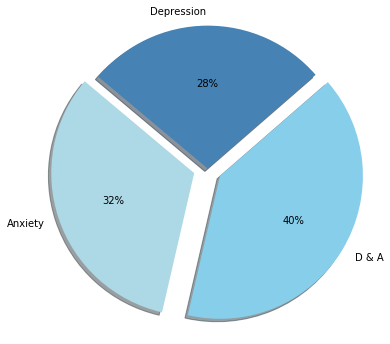

In [37]:
# plt.scatter(kansas_df["value"],kansas_df["indicator"], marker="*",
#              facecolors ="slateblue")
# plt.xlabel("Percentages")
# plt.ylabel("Average Percentage for Kansas") 
labels= {"Anxiety","Depression", "D & A"}
sizes = [26,32,22]
colors = {"steelblue", "lightblue","skyblue"}
explode = (0.1,0.1,0)

figure = plt.subplots(figsize=(6, 6))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.0f%%",shadow=True, startangle=140,)
plt.axis("equal",fontsize = 12)

plt.show()

Text(0.5, 0, 'value')

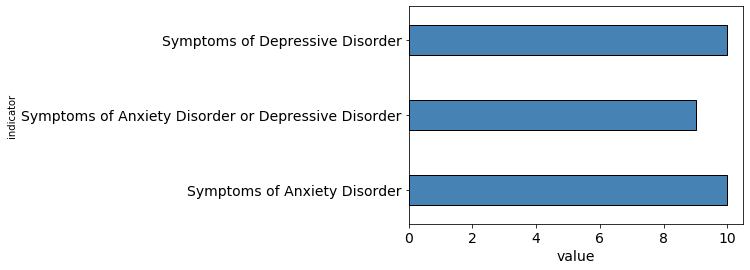

In [8]:
ks_wks.plot(kind="barh", fontsize=(14), color="steelblue", width=.40, edgeColor=('black'), linestyle='-')
plt.xlabel(("value"),color="black", fontsize=14)

In [9]:
#chart for kansas 
Mo_df = new_name_df.loc[(new_name_df["state"]=='Missouri')]
#kansas_df[['indicator', 'week']].value_counts()
Mo_df[:3]

,indicator,week,state,value
44,Symptoms of Depressive Disorder,1,Missouri,21.0
114,Symptoms of Anxiety Disorder,1,Missouri,30.4
184,Symptoms of Anxiety Disorder or Depressive Dis...,1,Missouri,35.2


Text(0.5, 0, 'Average Percentage for Missouri(in %)')

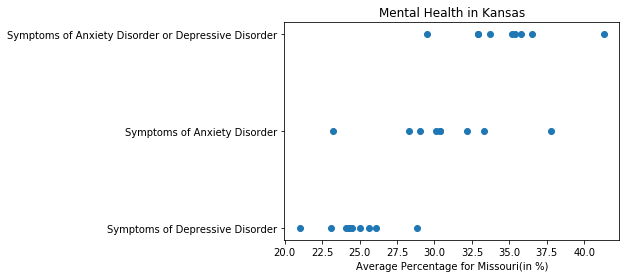

In [10]:
# mo_wks=Mo_df.groupby("indicator")["week"].count()
# mo_wks.plot

# mo_wks.plot(kind="barh",fontsize=(14),color="darkred", width=.40,edgeColor=('black'),linestyle='-')
# plt.xlabel(("Weeks"),color="black", fontsize=14)

plt.scatter(Mo_df["value"],Mo_df["indicator"])
plt.title("Mental Health in Kansas")
plt.xlabel("Average Percentage for Missouri(in %)")

In [11]:
all_states=file_one.loc[(file_one['state']=='United States')]
all_states

cleaned_all_states=all_states[['indicator','state','week', 'value']].copy()
cleaned_all_states


,indicator,state,week,value
0,Symptoms of Depressive Disorder,United States,1,23.5
1,Symptoms of Depressive Disorder,United States,1,32.7
2,Symptoms of Depressive Disorder,United States,1,25.7
3,Symptoms of Depressive Disorder,United States,1,24.8
4,Symptoms of Depressive Disorder,United States,1,23.2
...,...,...,...,...
1974,Symptoms of Anxiety Disorder,United States,10,43.3
1975,Symptoms of Anxiety Disorder,United States,10,40.7
1976,Symptoms of Anxiety Disorder,United States,10,34.9
1977,Symptoms of Anxiety Disorder,United States,10,37.0


Text(0.5, 0, 'Weeks')

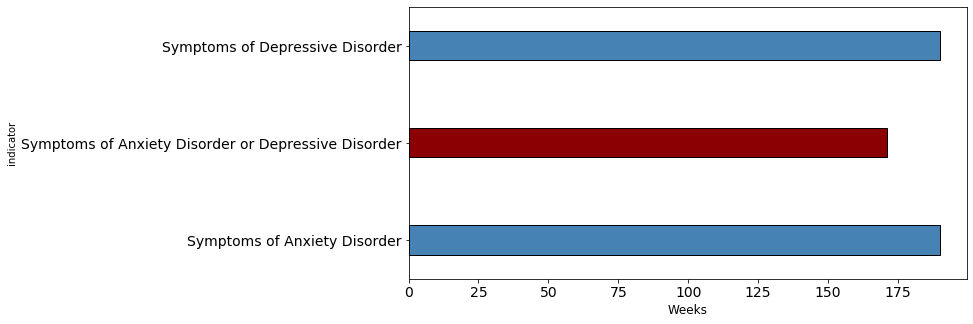

In [12]:
cleaned_all_states=cleaned_all_states.groupby("indicator")["week"].count()
cleaned_all_states.plot

cleaned_all_states.plot(kind="barh", fontsize=(14), color=["steelblue","darkred","steelblue"], width=.3, 
                        edgeColor=("black"), figsize=(10,5), linestyle='-')
plt.xlabel(("Weeks"),color="black", fontsize=12)

In [13]:
cleaned_all_states=cleaned_all_states.groupby("indicator")["week"].count()
cleaned_all_states.plot

cleaned_all_states.plot(kind="barh", fontsize=(14), color=["steelblue","darkred","steelblue"], width=.3, 
                        edgeColor=("black"), figsize=(10,5), linestyle='-')
plt.xlabel(("Weeks"),color="black", fontsize=12)

KeyError: 'Column not found: week'

In [ ]:
# cleanedAll=cleaned_all_states.groupby(['week','indicator'])
# cleanedAll.count().head(10)

# country_mean=cleanedAll['value'].mean()
# final_total=pd.DataFrame({'National Average(%)':country_mean})
# final_total.head()

In [ ]:
# ks_wks= kansas_df.groupby("indicator")["week"].count()
# ks_wks.plot(kind="barh")
# plt.xticks(rotation=45, horizontalalignment="right")
# plt.y("Weeks")

In [ ]:
# # fig=plt.figure(figsize=(35,25))
# ks_value= kansas_df.groupby("value")["indicator"].count()
# ks_value.plot(kind="barh")
# plt.xticks(rotation=45, horizontalalignment="right")
# df = kansas_df[['indicator','value']]
# df.plot(kind = 'bar')